In [ ]:
import torch
import torchvision
import shutil
import sys
import os
os.chdir('/content')
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

!{sys.executable} -m pip install npsam

if not os.path.isdir('/content/Sample_images'):
  !wget -N https://gitlab.au.dk/disorder/np-sam/-/archive/main/np-sam-main.zip?path=examples/Sample_images
  !unzip /content/np-sam-main.zip?path=examples%2FSample_images
  shutil.move('/content/np-sam-main-examples-Sample_images/examples/Sample_images', '/content/Sample_images')
  !rm /content/np-sam-main.zip?path=examples%2FSample_images
  !rm -rf /content/np-sam-main-examples-Sample_images

from npsam import *

PyTorch version: 2.3.0+cu121
Torchvision version: 0.18.0+cu121
CUDA is available: True
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10

Upload the image(s) to to the content folder and set a pathname called `filepath` to a file or a folder of the filetype .png, .jpg, .jpeg, .tif, .tiff (either an absolute or relative pathname)

Call the `SAM` function from `NPSAM.py` to get masks from the image. The function takes a filepath as the first argument and the following keyword arguments:<br>
 - `device` (str): Can be either `cuda` or `cpu` (`default='cpu'`). <br>
 - `PPS` (int): Sets the sampling gridsize for the image (`default=64`). <br>
 - `SAM_model` (str): Chooses which SAM weights to use. Can either be `'f'` for [FastSAM](https://github.com/CASIA-IVA-Lab/FastSAM), `'h'` for huge, `'l'` for large, `'b'` for base or `'auto'` which chooses the largest of the three regular SAM weights availabe. (`default='auto'`) <br>
 - `shape_filter` (bool): Removes faulty masks for a better and faster experience. However, for concave NPs it might cause problems (`default=True`) <br>
 - `min_masks_region_area` (int): Sets the minimum mask area in pixels. Makes SAM faster but will miss NPs smaller than threshold (`default=35`) <br>
 - `crop_and_enlarge` (bool): If `True`, it crops the image into 4 slightly overlapping parts that are also zoomed in (e.g., a 512x512 image is cropped to 4 680x680 images (340x340 before zoom), and runs SAM on all 4. Afterwards, the masks are stiched back together (`default=False`). <br>
 - `invert` (bool): If `True`, the image is inverted before running SAM. The masks are saved as usual (`default=False`). <br>
 - `double` (bool): If `True`, the original and inverted image will be segmented and stitched together. <br>
 - `**kwargs`: More key word arguments can be applied see [documentation](https://github.com/facebookresearch/segment-anything/blob/main/segment_anything/automatic_mask_generator.py#L35) of the model.

When executing `SAM` a folder `<filename>_files` is created next to the file(s).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the folder containing the images
filepath = '/content/drive/MyDrive/Final IDCC-SAM/Dataset/Rebuttal/ADC/Test_NP-SAM/'

filepath_test = '/content/drive/MyDrive/Final IDCC-SAM/Dataset/Rebuttal/ADC/Test/images2'

In [ ]:
SAM(filepath_test, device='cuda', PPS=64, SAM_model='h')

SAM weights were not found. This is probably because it is the first time running NP-SAM with this option.

Do you want to download the huge weights file (size: 2.5 GB)? y/n: y
sam_vit_h_4b8939.pth: 100%|██████████| 2.39G/2.39G [03:01<00:00, 14.1MiB/s]
File downloaded successfully: /usr/local/lib/python3.10/dist-packages/npsam/sam_vit_h_4b8939.pth
54 masks found. It took 32 seconds


If `SAM` has already been executed once it is not necessary to segment the image again, as the masks have previously been saved in the folder `<filename>_files`, that it unless you want to redo it with other parameters.

Run NP-SAM

In [ ]:
import pandas as pd
from io import StringIO
import sys

# Define the Capturing class to capture output
class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        self._stderr = sys.stderr
        sys.stdout = self._stringio = StringIO()
        sys.stderr = StringIO()
        return self

    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        sys.stdout = self._stdout
        sys.stderr = self._stderr

# Run the SAM function and capture its output
with Capturing() as output:
    SAM(filepath, device='cuda', PPS=64, SAM_model='h')

# Print captured output for debugging
for line in output:
    print(line)

# Initialize a list to store image names and mask counts
results = []

# Variables to store current image name
current_image_name = None

# Process the captured output
for line in output:
    if "Now working on" in line:
        # Extract image name
        parts = line.split(' ')
        current_image_name = parts[-1]
    elif "masks found" in line and current_image_name:
        # Extract number of masks
        parts = line.split(' ')
        num_masks = int(parts[0])
        # Append result with current image name and mask count
        results.append({"image_name": current_image_name, "num_masks": num_masks})
        # Reset current_image_name for next iteration
        current_image_name = None

# Create a pandas DataFrame from the results list
df = pd.DataFrame(results)

# Save the DataFrame to an Excel file
df.to_excel("/content/drive/MyDrive/Final IDCC-SAM/Rebuttal/ADC/NP-SAM/NP-SAM_prediction_summary_ADC_draft.xlsx", index=False)

# Print DataFrame to debug
print(df)


The huge SAM weight (sam_vit_h_4b8939.pth) were chosen.
1/50 - Now working on: Copy of 30600-18700_GTEX-18QFQ_Adipose-Subcutaneous
66 masks found. It took 29 seconds
2/50 - Now working on: Copy of 30600-11900_GTEX-144GL_Adipose-Subcutaneous
70 masks found. It took 28 seconds
3/50 - Now working on: Copy of 30600-11900_GTEX-14B4R_Adipose-Subcutaneous
82 masks found. It took 27 seconds
4/50 - Now working on: Copy of 28900-30600_GTEX-U3ZH_Adipose-Subcutaneous
29 masks found. It took 27 seconds
5/50 - Now working on: Copy of 30600-6800_GTEX-15DYW_Adipose-Subcutaneous
96 masks found. It took 30 seconds
6/50 - Now working on: Copy of 30600-17000_GTEX-OHPK_Adipose-Subcutaneous
50 masks found. It took 29 seconds
7/50 - Now working on: Copy of 30600-11900_GTEX-13O3O_Adipose-Subcutaneous
55 masks found. It took 30 seconds
8/50 - Now working on: Copy of 28900-27200_GTEX-16AAH_Adipose-Subcutaneous
63 masks found. It took 28 seconds
9/50 - Now working on: Copy of 30600-18700_GTEX-ZZPU_Adipose-Subcut

Compute Raw MAE and AAE

In [ ]:
import pandas as pd

# Paths to the files
result_excel_path = "/content/drive/MyDrive/Final IDCC-SAM/Rebuttal/ADC/NP-SAM/NP-SAM_prediction_summary_ADC_draft.xlsx"
ground_truth_csv_path = '/content/drive/MyDrive/Final IDCC-SAM/Dataset/Rebuttal/ADC/ground_truth.csv'

# Read the result DataFrame
result_df = pd.read_excel(result_excel_path)

# Read the ground truth DataFrame
ground_truth_df = pd.read_csv(ground_truth_csv_path)

# Remove the ".png" suffix from the "image name" column in the ground truth DataFrame
ground_truth_df['image name'] = ground_truth_df['image name'].str.replace('.png', '')

# Display the ground truth DataFrame to understand its structure
print("Ground Truth DataFrame after removing '.png':")
print(ground_truth_df.head())

# Merge the DataFrames on the "image_name" column
merged_df = result_df.merge(ground_truth_df, left_on='image_name', right_on='image name', how='left')

# Delete the "image_name" and "SN" columns
merged_df.drop(columns=['image_name', 'SN'], inplace=True)

# Rename "num_masks" to "Prediction"
merged_df.rename(columns={'num_masks': 'Prediction'}, inplace=True)
merged_df.rename(columns={'ground truth': 'Ground Truth'}, inplace=True)

# Calculate Raw Absolute Error
merged_df['Raw Absolute Error'] = (merged_df['Ground Truth'] - merged_df['Prediction']).abs()

# Determine AAE <= 10
merged_df['AAE <= 10'] = merged_df['Raw Absolute Error'].apply(lambda x: 'Yes' if x <= 10 else 'No')

# Rearrange columns
merged_df = merged_df[['image name', 'Ground Truth', 'Prediction', 'Raw Absolute Error', 'AAE <= 10']]

# Display the merged DataFrame to verify the result
print("Merged DataFrame:")
print(merged_df.head())

# Save the merged DataFrame to a new Excel file
merged_df.to_excel("/content/drive/MyDrive/Final IDCC-SAM/Rebuttal/ADC/NP-SAM/NP-SAM_prediction_summary_ADC_final.xlsx", index=False)

# Print a message to indicate completion
print("Merged DataFrame saved to NP-SAM_prediction_summary_ADC_final.xlsx")


Ground Truth DataFrame after removing '.png':
   SN                                   image name  ground truth
0   1   18700-23800_GTEX-ZV7C_Adipose-Subcutaneous           132
1   2   34000-5100_GTEX-144GL_Adipose-Subcutaneous           157
2   3  27200-15300_GTEX-1122O_Adipose-Subcutaneous           125
3   4   11900-28900_GTEX-ZVT3_Adipose-Subcutaneous           140
4   5     3400-6800_GTEX-S4UY_Adipose-Subcutaneous           127
Merged DataFrame:
                                    image name  Ground Truth  Prediction  \
0  30600-18700_GTEX-18QFQ_Adipose-Subcutaneous           177          66   
1  30600-11900_GTEX-144GL_Adipose-Subcutaneous           162          70   
2  30600-11900_GTEX-14B4R_Adipose-Subcutaneous           147          82   
3   28900-30600_GTEX-U3ZH_Adipose-Subcutaneous           106          29   
4   30600-6800_GTEX-15DYW_Adipose-Subcutaneous           176          96   

   Raw Absolute Error AAE <= 10  
0                 111        No  
1                  92

For a quick visualisation images and masks can be plotted.

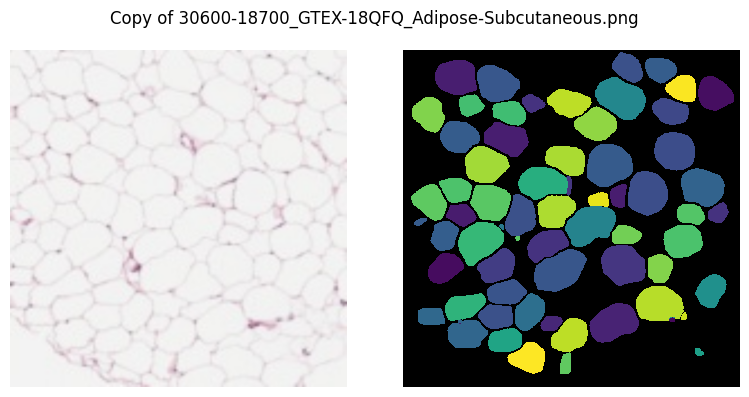

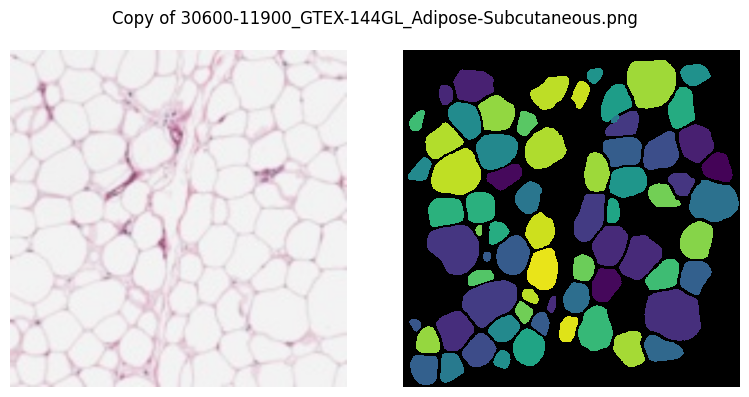

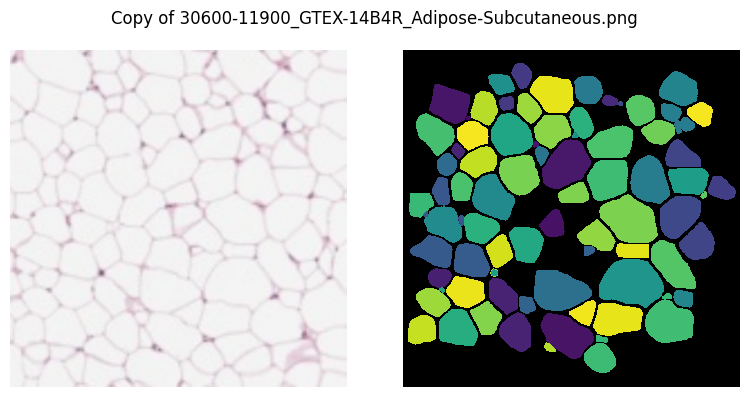

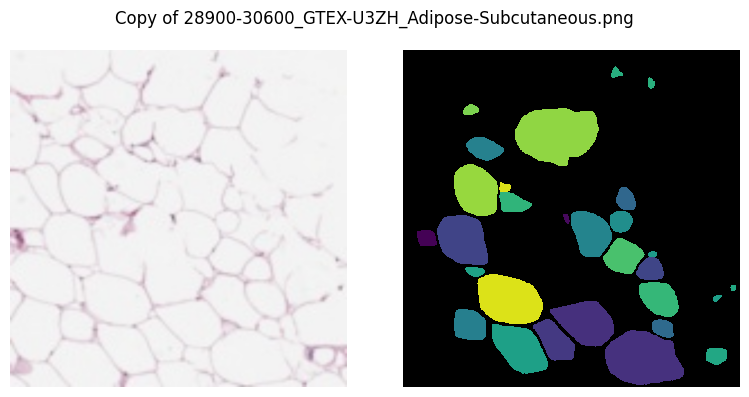

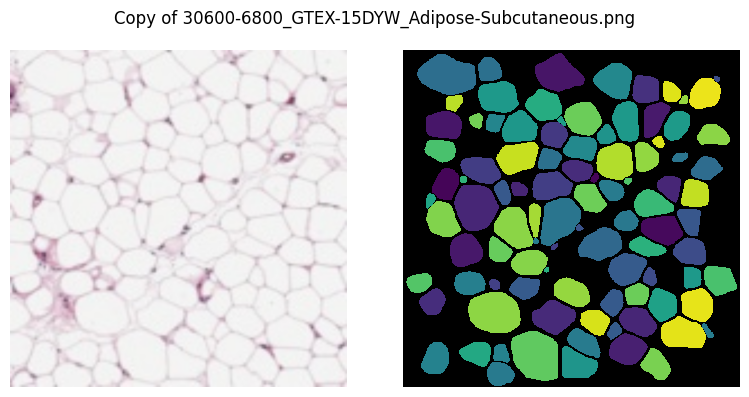

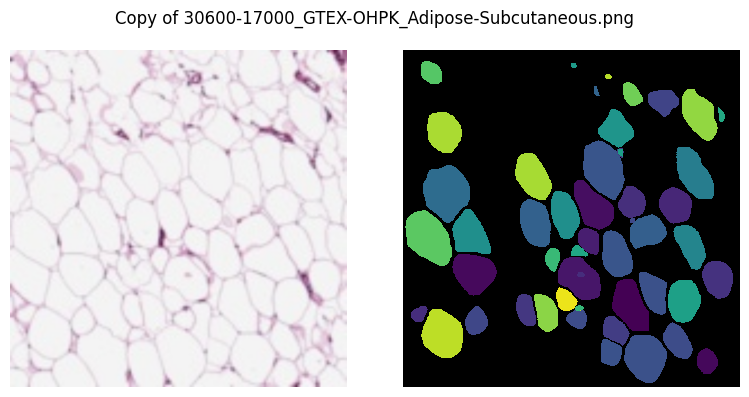

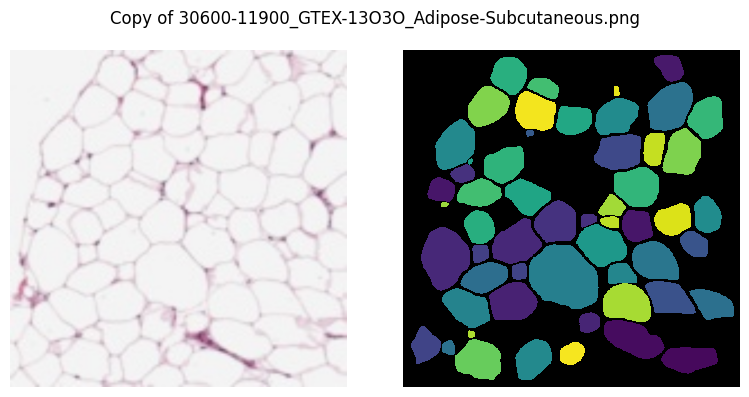

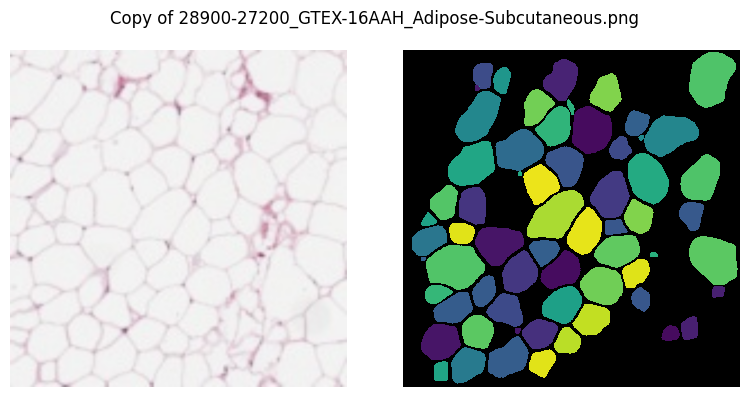

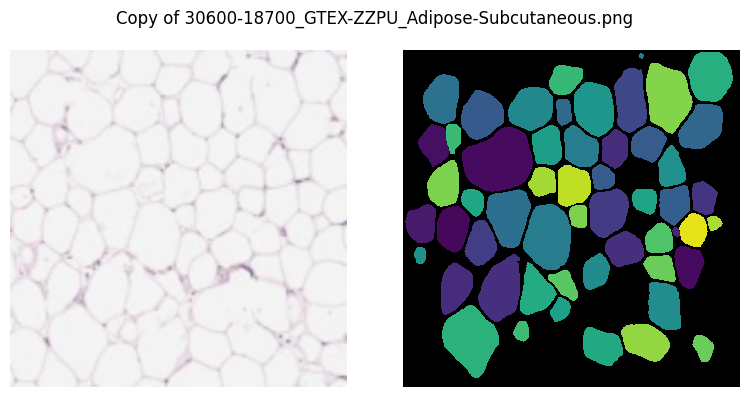

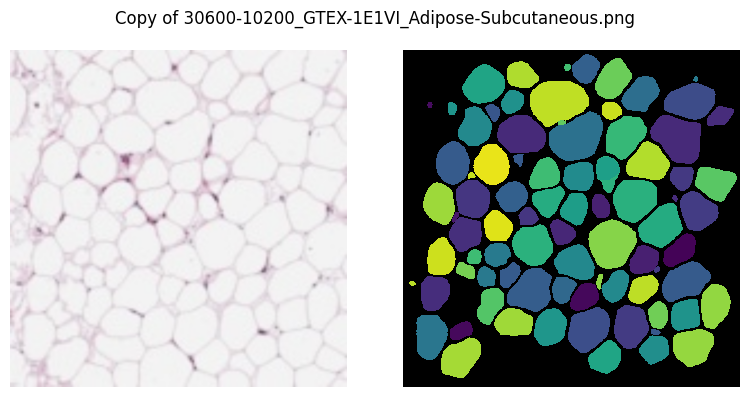

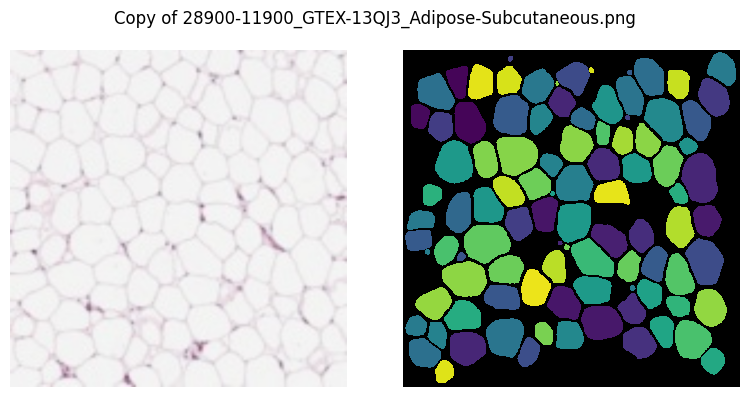

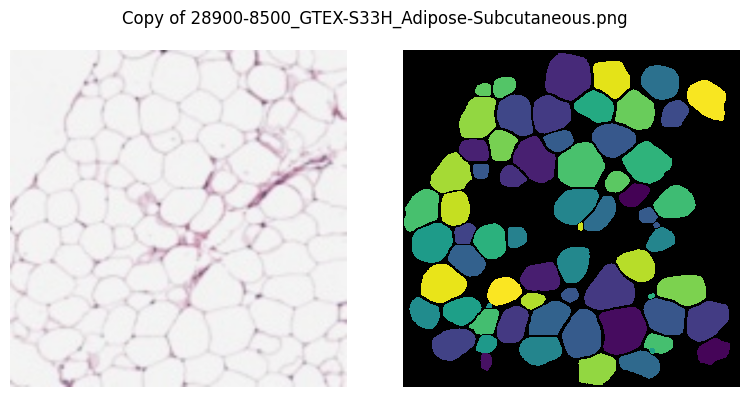

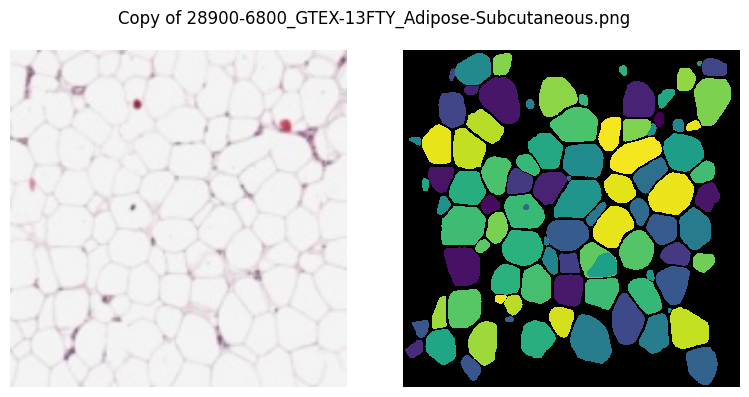

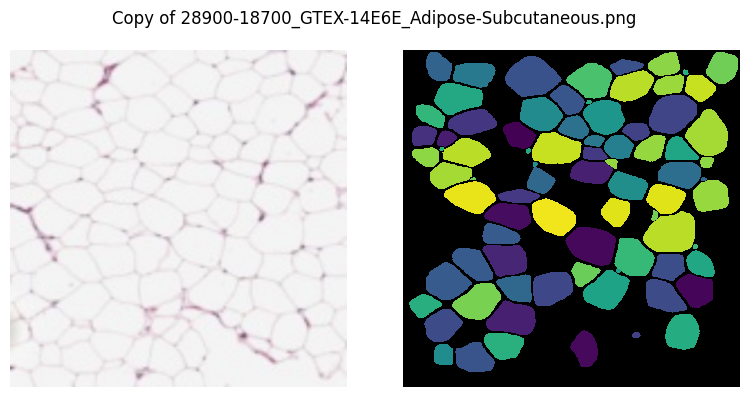

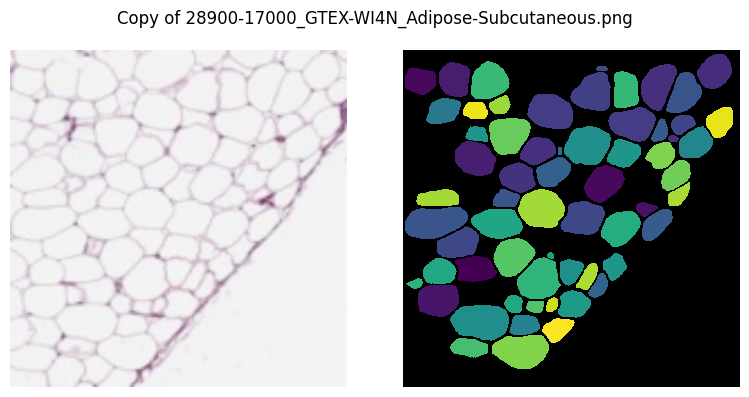

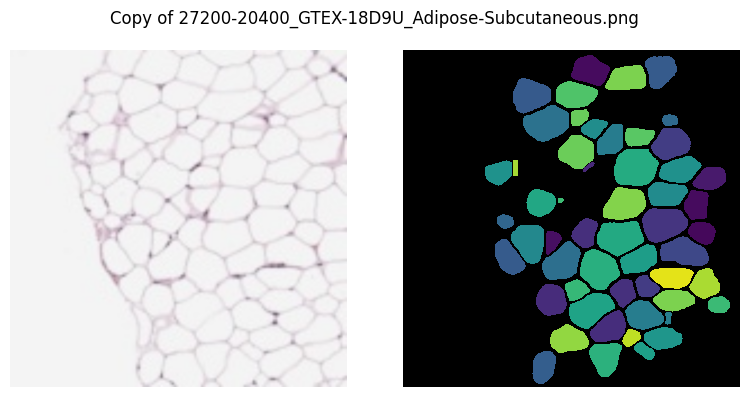

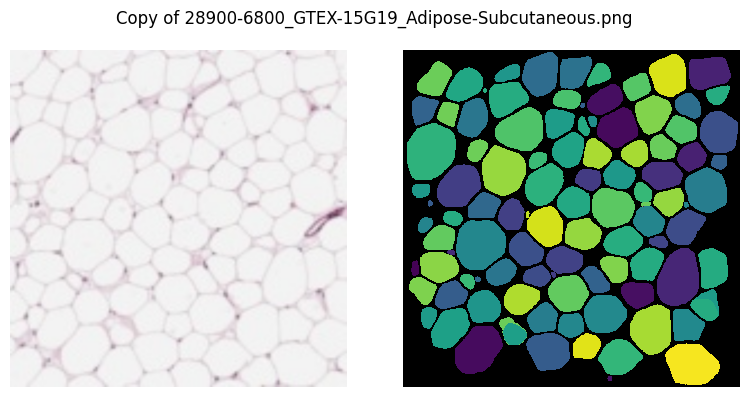

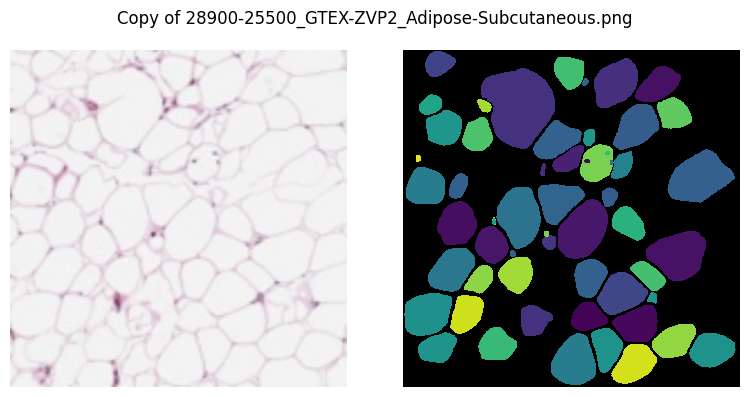

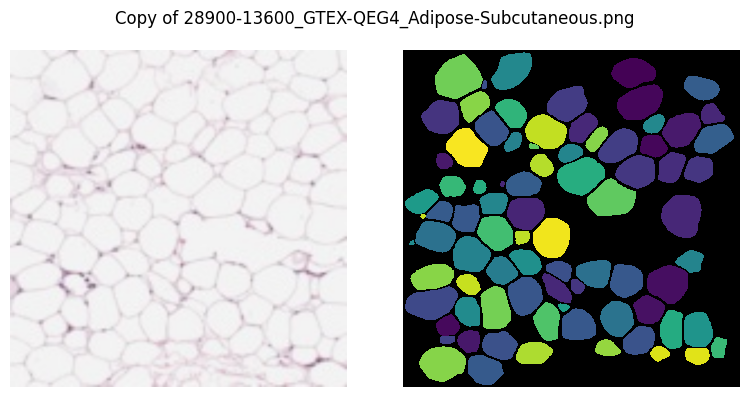

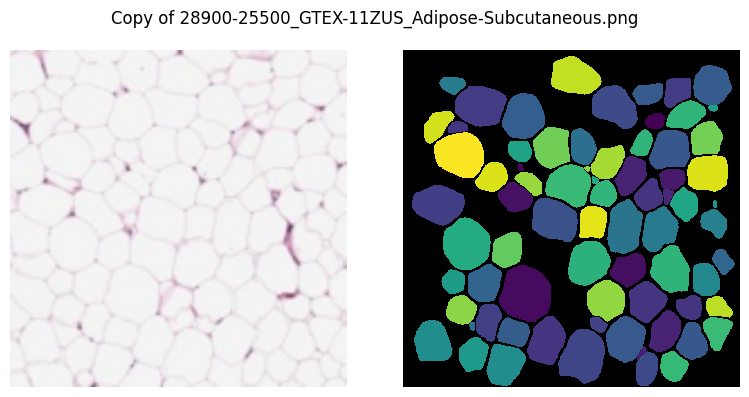

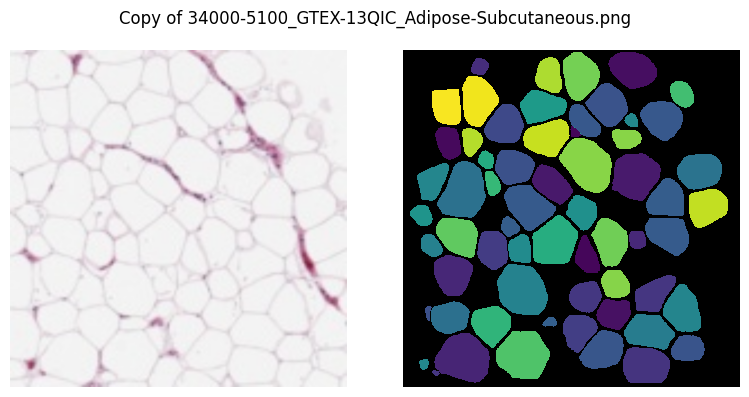

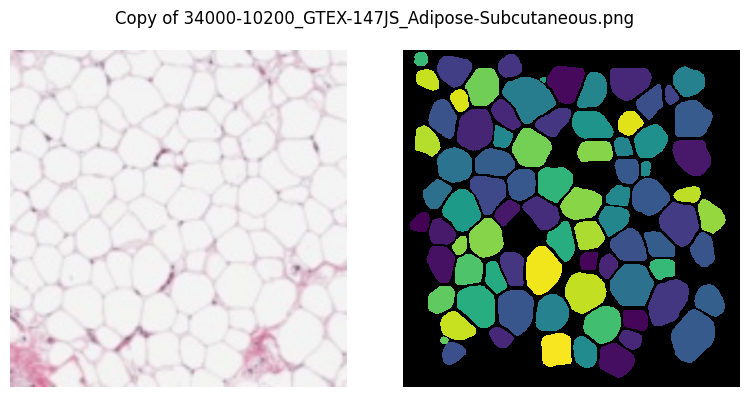

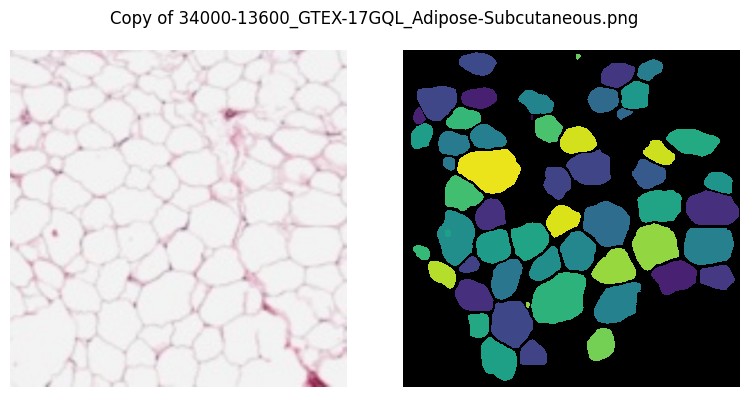

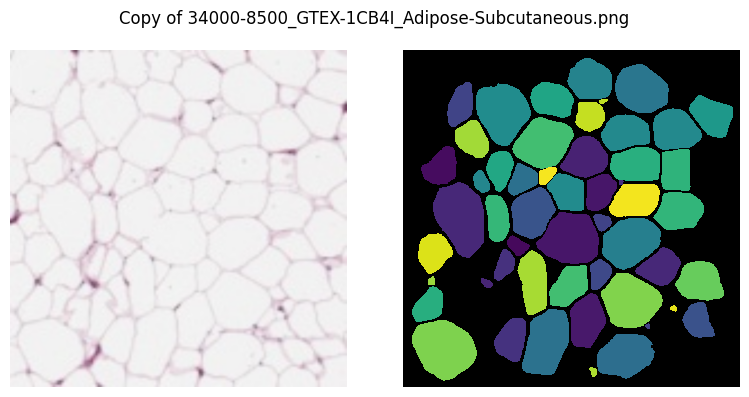

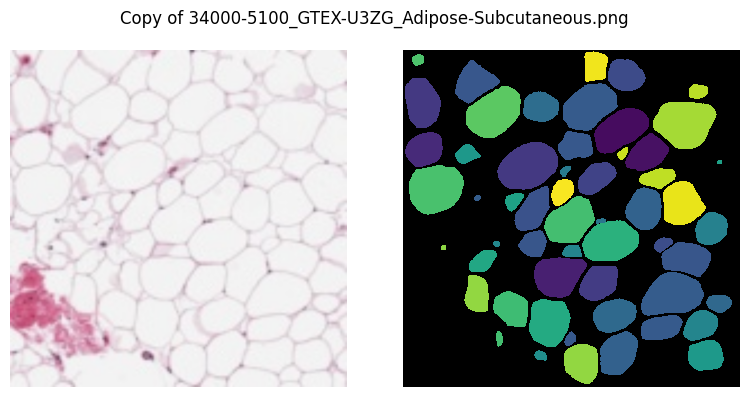

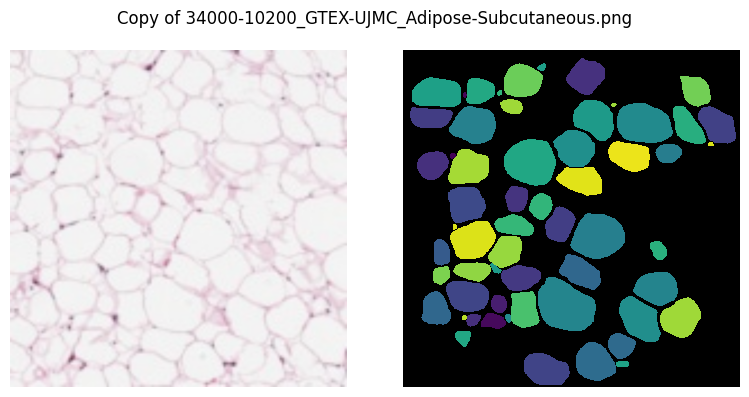

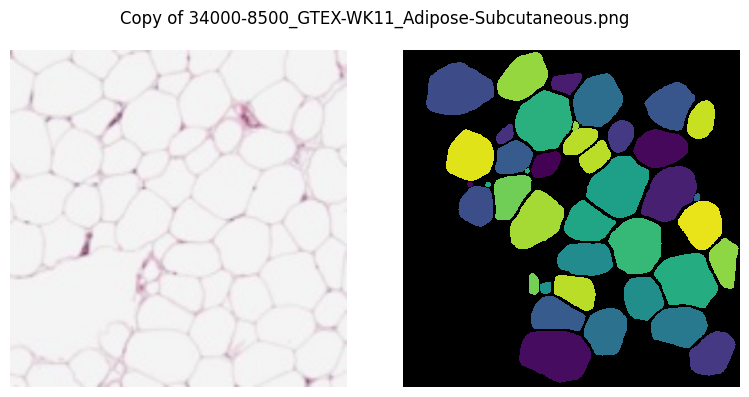

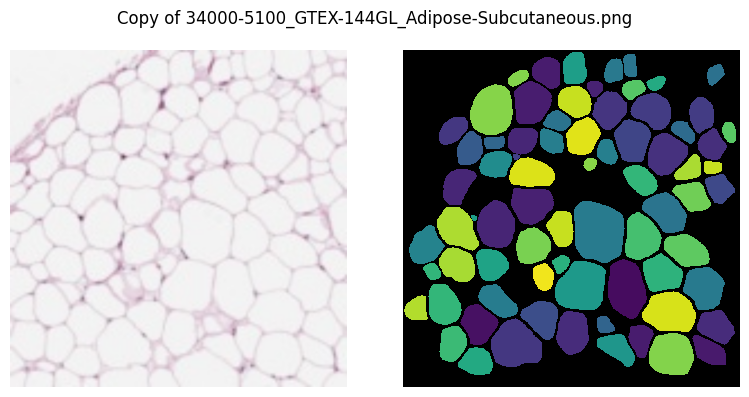

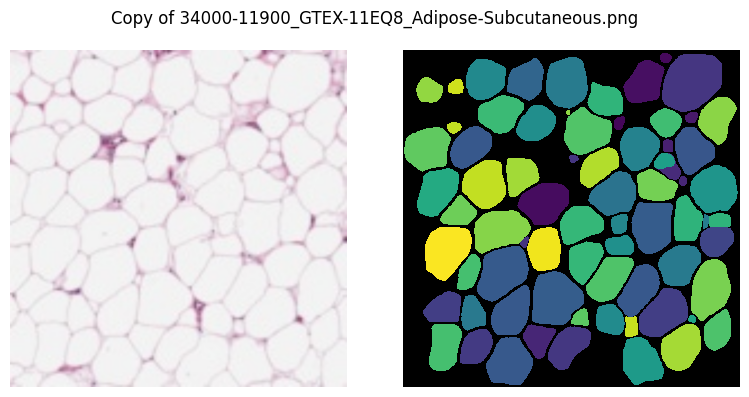

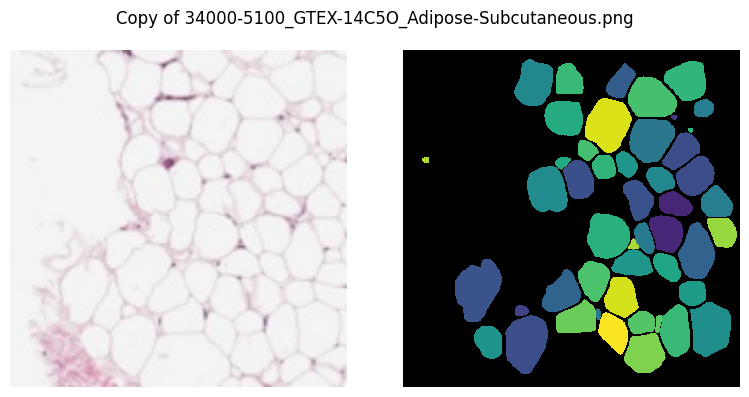

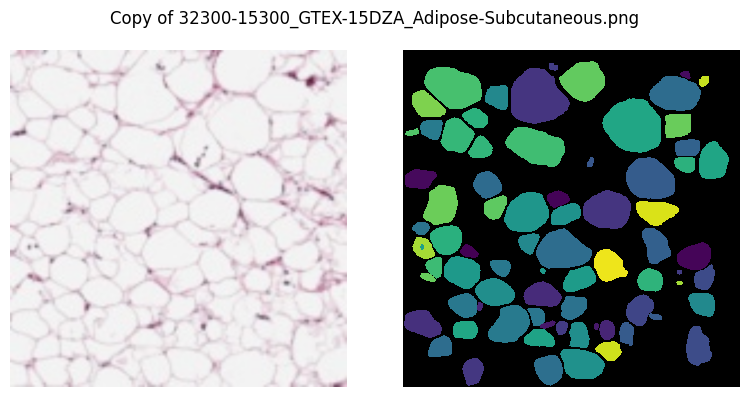

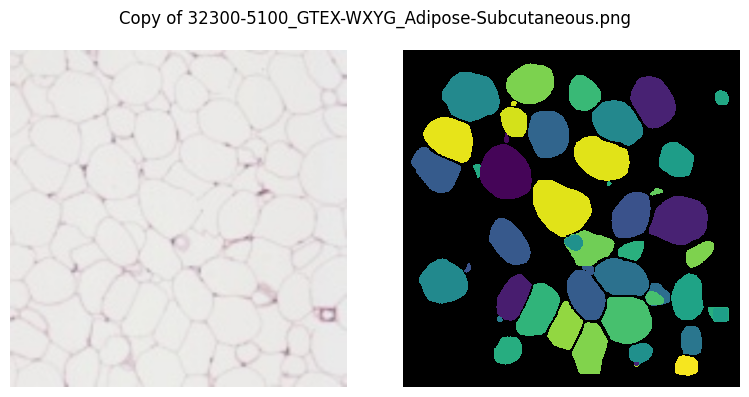

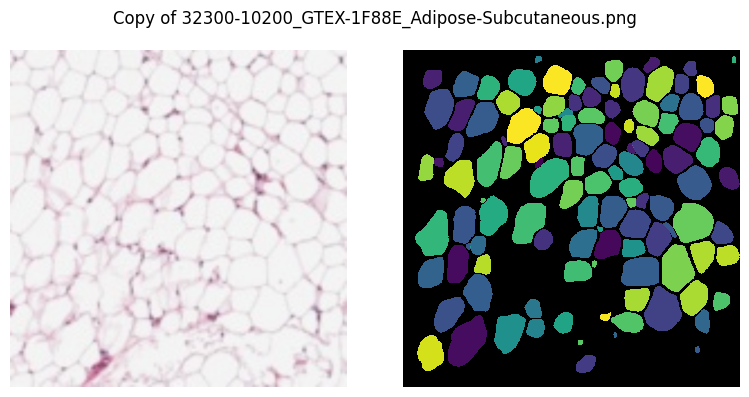

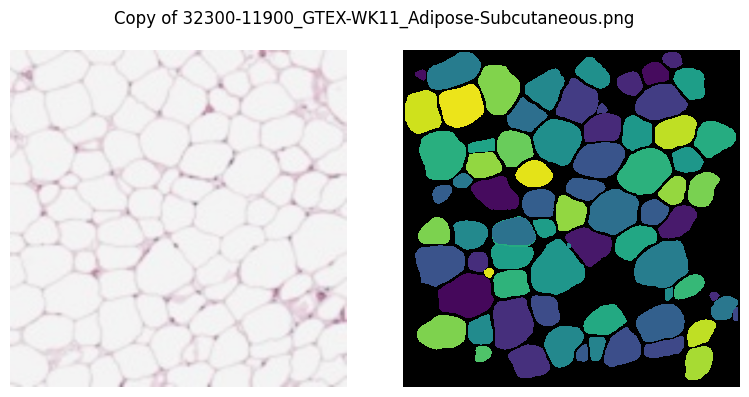

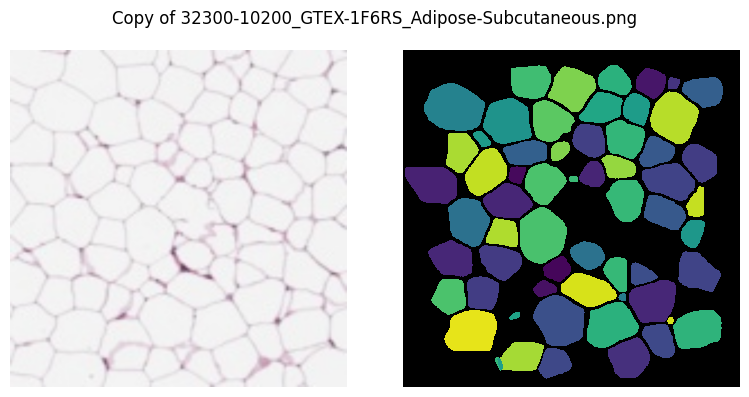

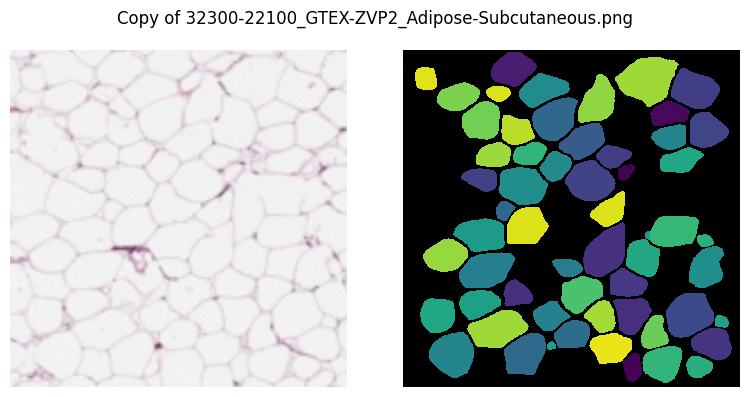

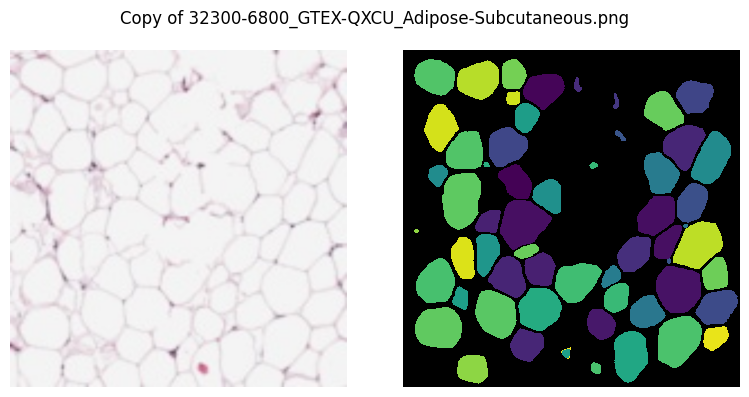

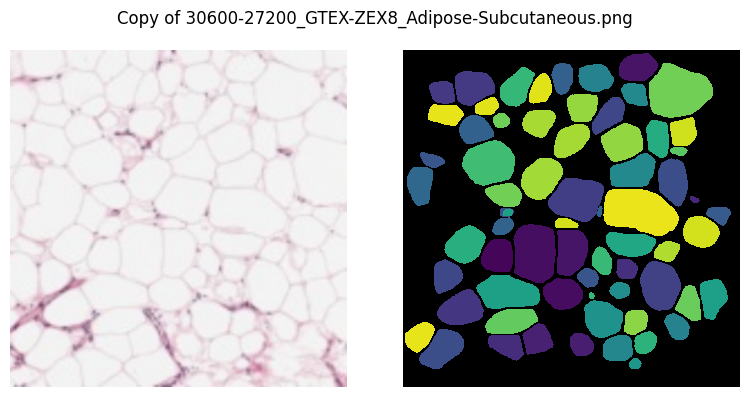

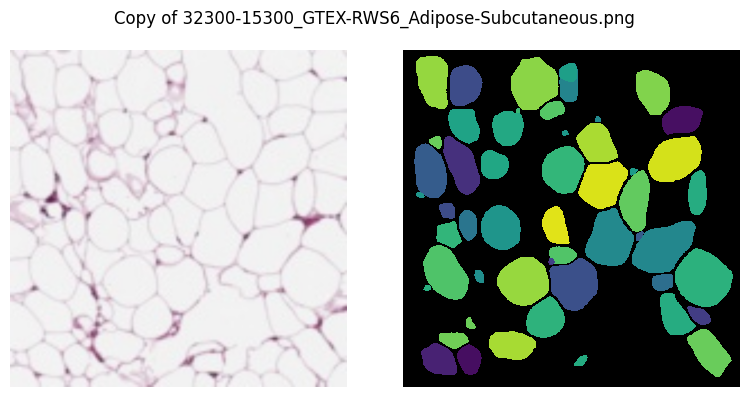

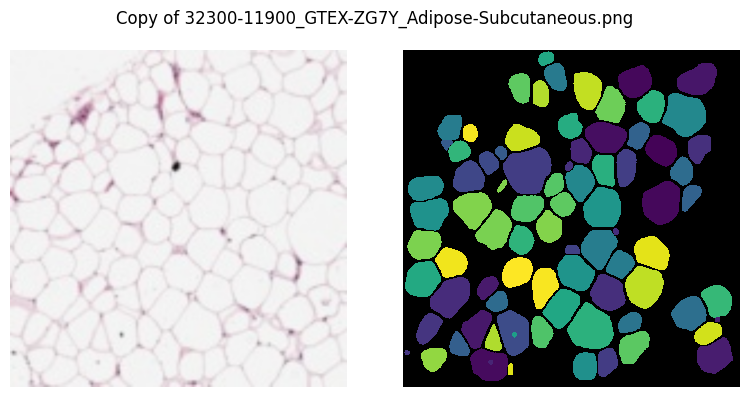

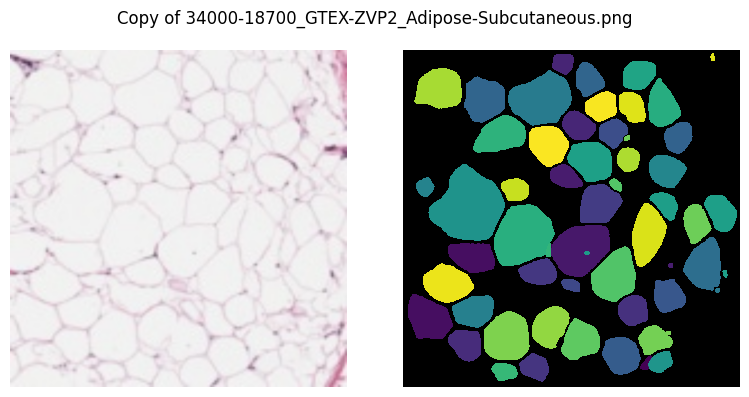

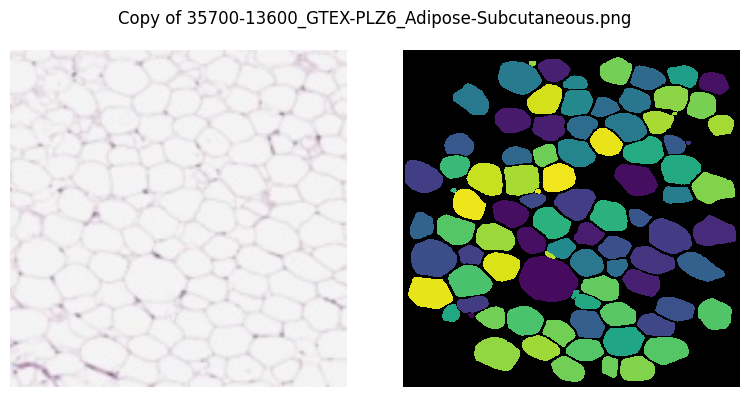

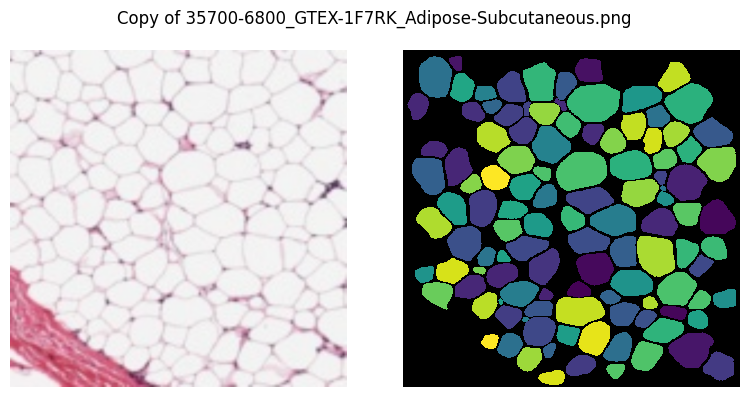

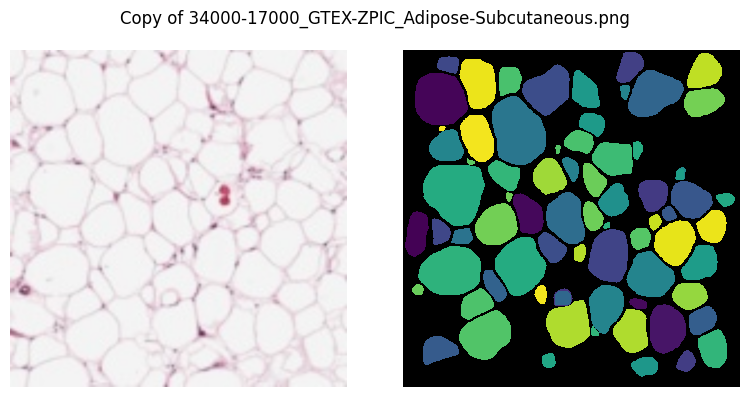

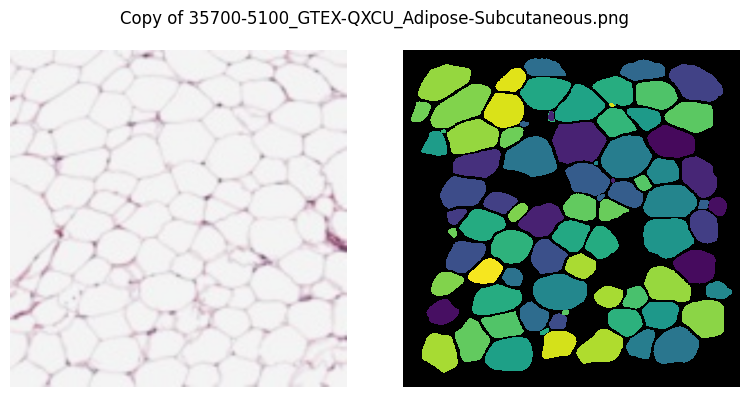

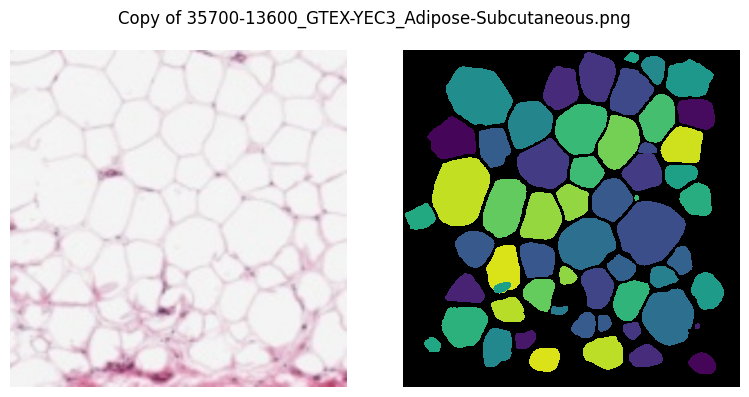

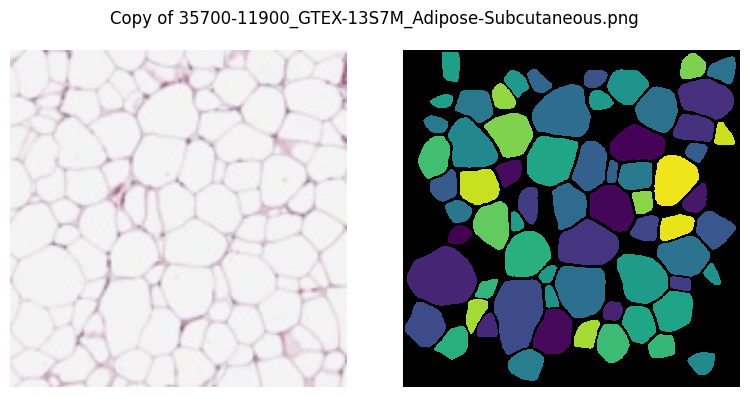

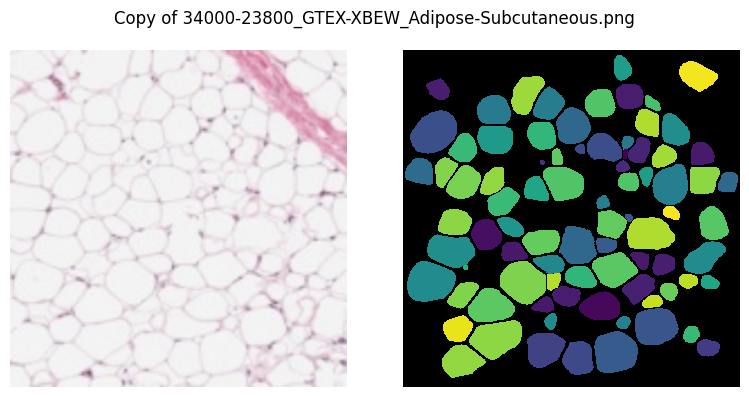

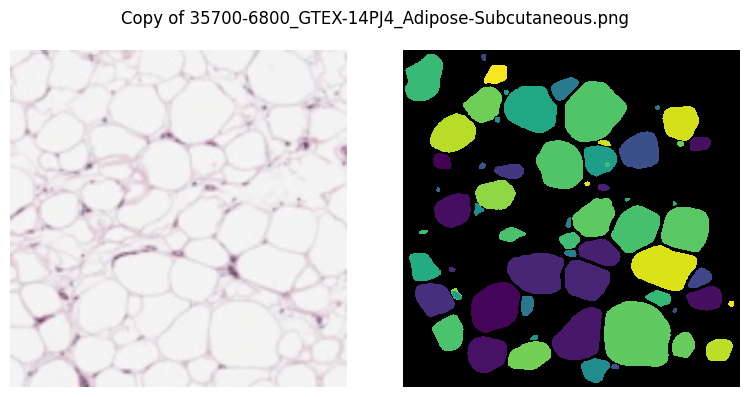

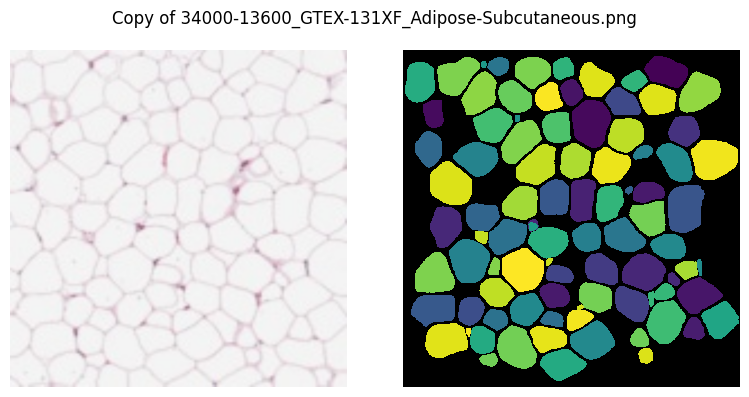

In [ ]:
mask_plot(filepath)

# Save the generated plots